In [1]:
library("forecast")

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [2]:
births = scan("../../Data/mybirths.dat.txt", skip = 3)

In [3]:
print(births)

  [1] 24.740 25.806 24.364 24.477 23.901 23.175 23.227 21.672 21.870 21.439
 [11] 21.089 23.709 21.669 21.752 20.761 23.479 23.824 23.105 23.110 21.759
 [21] 22.073 21.937 20.035 23.590 21.672 22.222 22.123 23.950 23.504 22.238
 [31] 23.142 21.059 21.573 21.548 20.000 22.424 20.615 21.761 22.874 24.104
 [41] 23.748 23.262 22.907 21.519 22.025 22.604 20.894 24.677 23.673 25.320
 [51] 23.583 24.671 24.454 24.122 24.252 22.084 22.991 23.287 23.049 25.076
 [61] 24.037 24.430 24.667 26.451 25.618 25.014 25.110 22.964 23.981 23.798
 [71] 22.270 24.775 22.646 23.988 24.737 26.276 25.816 25.210 25.199 23.162
 [81] 24.707 24.364 22.644 25.565 24.062 25.431 24.635 27.009 26.606 26.268
 [91] 26.462 25.246 25.180 24.657 23.304 26.982 26.199 27.210 26.122 26.706
[101] 26.878 26.152 26.379 24.712 25.688 24.990 24.239 26.721 23.475 24.767
[111] 26.219 28.361 28.599 27.914 27.784 25.693 26.881 26.217 24.218 27.914
[121] 26.975 28.527 27.139 28.982 28.169 28.056 29.136 26.291 26.987 26.589
[131] 24.848

In [4]:
# Convert to time series
births.timeseries = ts(births, start = c(1946, 1), frequency = 12)
print("Birth Time Series:")
births.timeseries

[1] "Birth Time Series:"


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1946,24.740,25.806,24.364,24.477,23.901,23.175,23.227,21.672,21.870,21.439,21.089,23.709
1947,21.669,21.752,20.761,23.479,23.824,23.105,23.110,21.759,22.073,21.937,20.035,23.590
1948,21.672,22.222,22.123,23.950,23.504,22.238,23.142,21.059,21.573,21.548,20.000,22.424
1949,20.615,21.761,22.874,24.104,23.748,23.262,22.907,21.519,22.025,22.604,20.894,24.677
1950,23.673,25.320,23.583,24.671,24.454,24.122,24.252,22.084,22.991,23.287,23.049,25.076
1951,24.037,24.430,24.667,26.451,25.618,25.014,25.110,22.964,23.981,23.798,22.270,24.775
1952,22.646,23.988,24.737,26.276,25.816,25.210,25.199,23.162,24.707,24.364,22.644,25.565
1953,24.062,25.431,24.635,27.009,26.606,26.268,26.462,25.246,25.180,24.657,23.304,26.982
1954,26.199,27.210,26.122,26.706,26.878,26.152,26.379,24.712,25.688,24.990,24.239,26.721
1955,23.475,24.767,26.219,28.361,28.599,27.914,27.784,25.693,26.881,26.217,24.218,27.914


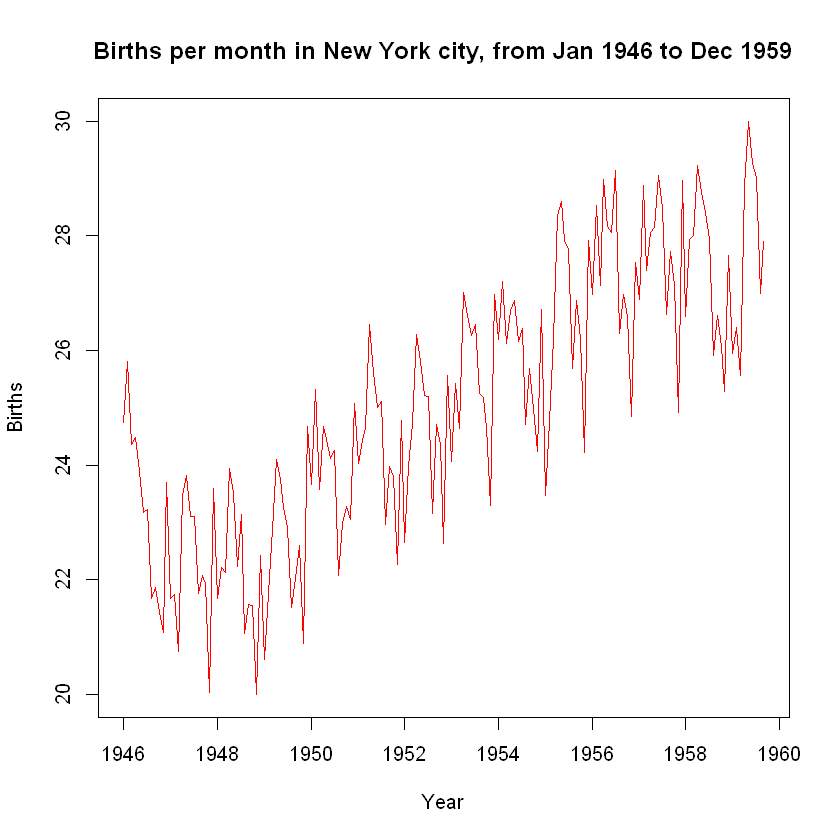

In [5]:
plot(births.timeseries, main = "Births per month in New York city, from Jan 1946 to Dec 1959",
     col = 'red', xlab = 'Year', ylab = 'Births')

* From 1950 newborn increased every year

In [6]:
comp = decompose(births.timeseries)
comp$x

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1946,24.740,25.806,24.364,24.477,23.901,23.175,23.227,21.672,21.870,21.439,21.089,23.709
1947,21.669,21.752,20.761,23.479,23.824,23.105,23.110,21.759,22.073,21.937,20.035,23.590
1948,21.672,22.222,22.123,23.950,23.504,22.238,23.142,21.059,21.573,21.548,20.000,22.424
1949,20.615,21.761,22.874,24.104,23.748,23.262,22.907,21.519,22.025,22.604,20.894,24.677
1950,23.673,25.320,23.583,24.671,24.454,24.122,24.252,22.084,22.991,23.287,23.049,25.076
1951,24.037,24.430,24.667,26.451,25.618,25.014,25.110,22.964,23.981,23.798,22.270,24.775
1952,22.646,23.988,24.737,26.276,25.816,25.210,25.199,23.162,24.707,24.364,22.644,25.565
1953,24.062,25.431,24.635,27.009,26.606,26.268,26.462,25.246,25.180,24.657,23.304,26.982
1954,26.199,27.210,26.122,26.706,26.878,26.152,26.379,24.712,25.688,24.990,24.239,26.721
1955,23.475,24.767,26.219,28.361,28.599,27.914,27.784,25.693,26.881,26.217,24.218,27.914


In [7]:
comp$seasonal

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1946,-0.8204260,0.2329041,-0.1720029,1.5139845,1.2193943,0.7476026,0.7564971,-1.1285125,-0.3955670,-0.6959420,-2.1017080,0.8437759
1947,-0.8204260,0.2329041,-0.1720029,1.5139845,1.2193943,0.7476026,0.7564971,-1.1285125,-0.3955670,-0.6959420,-2.1017080,0.8437759
1948,-0.8204260,0.2329041,-0.1720029,1.5139845,1.2193943,0.7476026,0.7564971,-1.1285125,-0.3955670,-0.6959420,-2.1017080,0.8437759
1949,-0.8204260,0.2329041,-0.1720029,1.5139845,1.2193943,0.7476026,0.7564971,-1.1285125,-0.3955670,-0.6959420,-2.1017080,0.8437759
1950,-0.8204260,0.2329041,-0.1720029,1.5139845,1.2193943,0.7476026,0.7564971,-1.1285125,-0.3955670,-0.6959420,-2.1017080,0.8437759
1951,-0.8204260,0.2329041,-0.1720029,1.5139845,1.2193943,0.7476026,0.7564971,-1.1285125,-0.3955670,-0.6959420,-2.1017080,0.8437759
1952,-0.8204260,0.2329041,-0.1720029,1.5139845,1.2193943,0.7476026,0.7564971,-1.1285125,-0.3955670,-0.6959420,-2.1017080,0.8437759
1953,-0.8204260,0.2329041,-0.1720029,1.5139845,1.2193943,0.7476026,0.7564971,-1.1285125,-0.3955670,-0.6959420,-2.1017080,0.8437759
1954,-0.8204260,0.2329041,-0.1720029,1.5139845,1.2193943,0.7476026,0.7564971,-1.1285125,-0.3955670,-0.6959420,-2.1017080,0.8437759
1955,-0.8204260,0.2329041,-0.1720029,1.5139845,1.2193943,0.7476026,0.7564971,-1.1285125,-0.3955670,-0.6959420,-2.1017080,0.8437759


In [8]:
comp$trend

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1946,NA,NA,NA,NA,NA,NA,23.16112,22.86425,22.54521,22.35350,22.30871,22.30258
1947,22.29479,22.29354,22.30562,22.33483,22.31167,22.26279,22.25796,22.27767,22.35400,22.43038,22.43667,22.38721
1948,22.35242,22.32458,22.27458,22.23754,22.21988,22.16983,22.07721,22.01396,22.02604,22.06375,22.08033,22.13317
1949,22.16604,22.17542,22.21342,22.27625,22.35750,22.48862,22.70992,22.98563,23.16346,23.21663,23.26967,23.33492
1950,23.42679,23.50638,23.57017,23.63888,23.75713,23.86354,23.89533,23.87342,23.88150,24.00083,24.12350,24.20917
1951,24.28208,24.35450,24.43242,24.49496,24.48379,24.43879,24.36829,24.29192,24.27642,24.27204,24.27300,24.28942
1952,24.30129,24.31325,24.35175,24.40558,24.44475,24.49325,24.58517,24.70429,24.76017,24.78646,24.84992,24.92692
1953,25.02362,25.16308,25.26963,25.30154,25.34125,25.42779,25.57588,25.73904,25.87513,25.92446,25.92317,25.92967
1954,25.92137,25.89567,25.89458,25.92963,25.98246,26.01054,25.88617,25.67087,25.57312,25.64612,25.78679,25.93192
1955,26.06388,26.16329,26.25388,26.35471,26.40496,26.45379,26.64933,26.95183,27.14683,27.21104,27.21900,27.20700


* According to seasonal part, April was the most newborn month, and the least was July

In [9]:
comp$random

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1946,NA,NA,NA,NA,NA,NA,-0.69062208,-0.06373747,-0.27964131,-0.21855798,0.88199971,0.56264074
1947,0.19463433,-0.77444580,-1.37262208,-0.36981786,0.29293908,0.09460575,0.09554458,0.60984586,0.11456702,0.20256702,-0.29995862,0.35901574
1948,0.14000933,-0.33548747,0.02041958,0.19847380,0.06473075,-0.67943592,0.30829458,0.17355420,-0.05747465,0.18019202,0.02137471,-0.55294260
1949,-0.73061567,-0.64732080,0.83258625,0.31376547,0.17110575,0.02577241,-0.55941375,-0.33811247,-0.74289131,0.08331702,-0.27395862,0.49830740
1950,1.06663433,1.58072086,0.18483625,-0.48185953,-0.52251925,-0.48914425,-0.39983042,-0.66090414,-0.49493298,-0.01789131,1.02720804,0.02305740
1951,0.57534266,-0.15740414,0.40658625,0.44205714,-0.08518592,-0.17239425,-0.01478875,-0.19940414,0.10015035,0.22190035,0.09870804,-0.35819260
1952,-0.83486567,-0.55815414,0.55725292,0.35643214,0.15185575,-0.03085259,-0.14266375,-0.41377914,0.34240035,0.27348369,-0.10420862,-0.20569260
1953,-0.14119901,0.03501253,-0.46262208,0.19347380,0.04535575,0.09260575,0.12962792,0.63547086,-0.29955798,-0.57151631,-0.51745862,0.20855740
1954,1.09805099,1.08142920,0.39941958,-0.73760953,-0.32385259,-0.60614425,-0.26366375,0.16963753,0.51044202,0.03981702,0.55391638,-0.05469260
1955,-1.76844901,-1.62919580,0.13712792,0.49230714,0.97464741,0.71260575,0.37816958,-0.13032080,0.12973369,-0.29809965,-0.89929196,-0.13677593


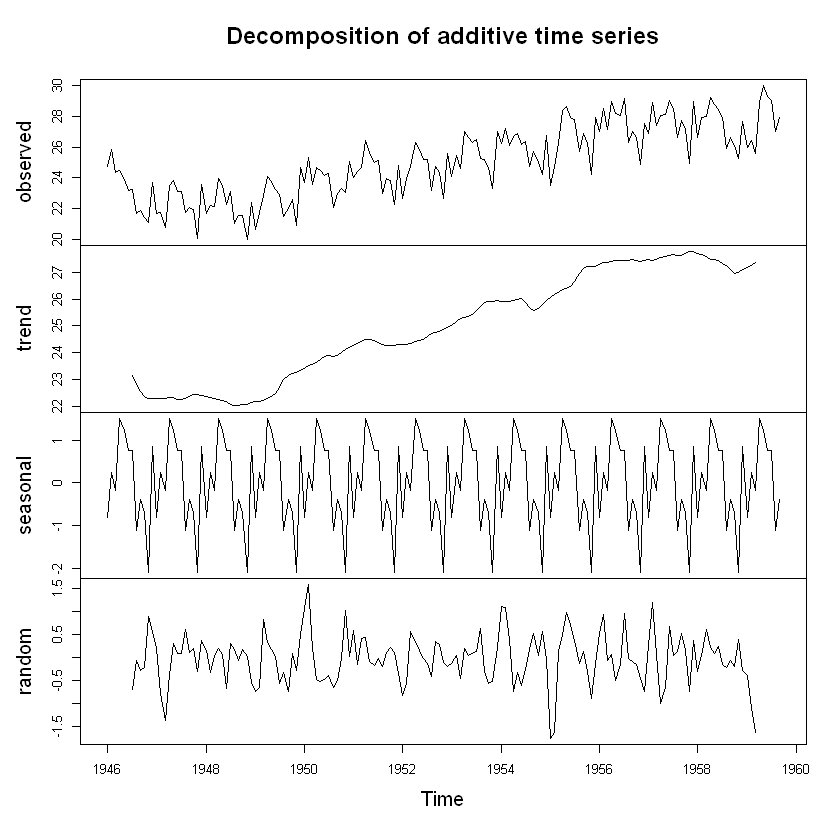

In [10]:
plot(comp)

In [11]:
# Forecasting
births.timeseries.forecast = HoltWinters(births.timeseries)
print(births.timeseries.forecast)

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = births.timeseries)

Smoothing parameters:
 alpha: 0.686454
 beta : 0.008857567
 gamma: 0.6828562

Coefficients:
           [,1]
a   28.23526659
b    0.01404313
s1  -0.77365521
s2  -2.08404489
s3   1.11945752
s4  -0.37371601
s5   0.83714172
s6   0.20710404
s7   1.88468799
s8   1.59554494
s9   0.96254105
s10  0.74685563
s11 -1.24615200
s12 -0.33493561


* alpha ~ 0,7: khá cao, cho thấy giá trị hiện tại phụ thuộc vào các giá trị gần đây trong quá khứ
* beta ~ 0: độ dốc của trend không cập nhật trong thời gian qua
* gamma ~ 0.7: ảnh hưởng của yếu tố mùa tại thời điểm hiện tại có phụ thuộc vào các giá trị gần

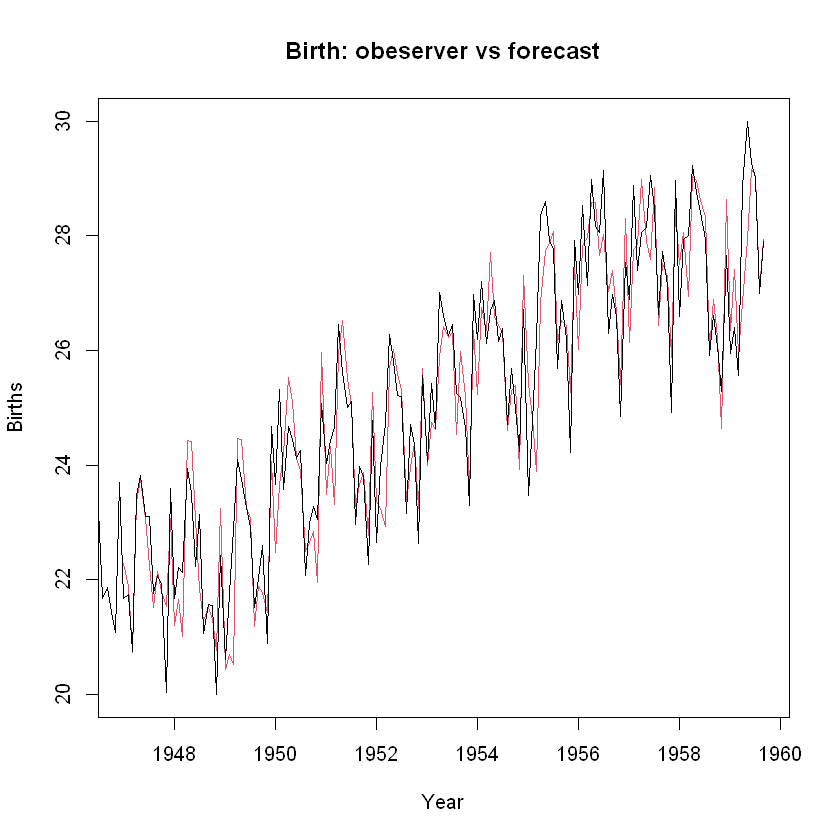

In [12]:
plot(births.timeseries.forecast, main = "Birth: obeserver vs forecast", xlab = "Year", ylab = "Births")

In [14]:
births.timeseries.forecast_6m = forecast(births.timeseries, h = 6)
print("Next 6 months:")
print(births.timeseries.forecast_6m)

[1] "Next 6 months:"
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Oct 1959       27.53257 26.71748 28.34767 26.28599 28.77915
Nov 1959       26.16734 25.02565 27.30904 24.42128 27.91341
Dec 1959       29.11625 27.72245 30.51004 26.98463 31.24787
Jan 1960       27.45746 25.85062 29.06430 25.00001 29.91491
Feb 1960       28.56743 26.77263 30.36223 25.82252 31.31234
Mar 1960       28.15576 26.19088 30.12063 25.15074 31.16077


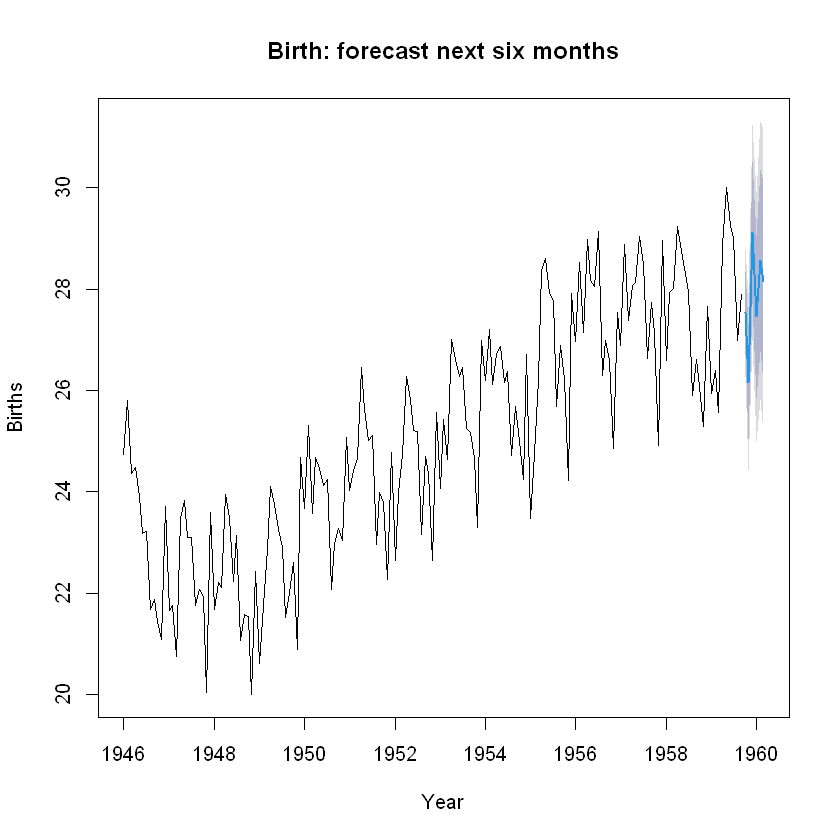

In [15]:
plot(births.timeseries.forecast_6m, main = "Birth: forecast next six months", xlab = "Year", ylab = "Births")